# Logistic Regression


In [1]:
from logistic_regression import *

## 1. Data
### We can see it as a cloud of points

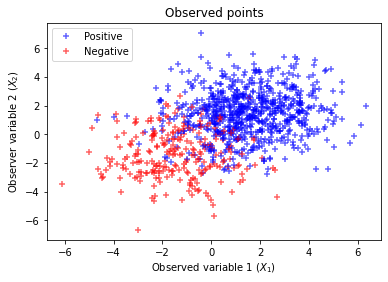

<Figure size 432x288 with 0 Axes>

In [2]:
x, y = make_unbalanced_dataset(1000, 20211017)

s = plt.scatter(x[:,0], x[:,1], c=y, cmap = 'bwr', alpha=.61, marker='+')
plt.title('Observed points')
plt.xlabel("Observed variable 1 ($X_1$)")
plt.ylabel("Observer variable 2 ($X_2$)")
h,l = s.legend_elements()
plt.legend(h,("Positive", "Negative"))
plt.show()
plt.clf()


### ... Or in a more mathematical way:
By plotting so, we cas easily see that a sigmoïd function can somewhat "sumerize" the following points:

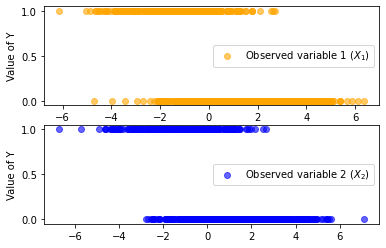

<Figure size 432x288 with 0 Axes>

In [3]:
plt.subplot(2,1,1)
plt.scatter(x[:,0], y, label="Observed variable 1 ($X_1$)", alpha=.6, c="orange")
plt.legend(loc="center right")
plt.ylabel("Value of Y")
plt.subplot(2,1,2)
plt.scatter(x[:,1], y, label="Observed variable 2 ($X_2$)", alpha=.6, c="blue")
plt.legend(loc="center right")
plt.ylabel("Value of Y")
plt.show()
plt.clf()

## 2. Logistic regression

In [15]:
estimator = LogisticRegressionClassifier(learning_rate=.1, n_iter=400)
estimator.fit(x, y)

LogisticRegressionClassifier(learning_rate=0.1, n_iter=400)

## Visualisation du modèle

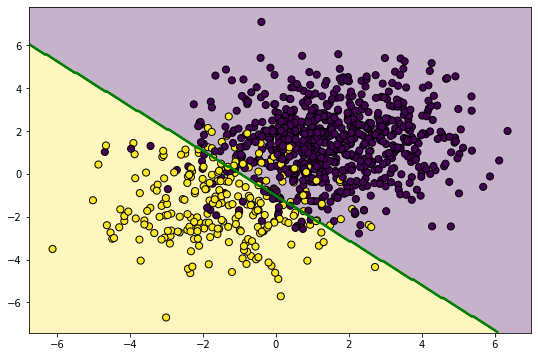

In [16]:
resolution = 300
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(x[:, 0], x[:, 1], c=y, s=50, edgecolor='k')

#limites du graphique
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# meshgrid
x1 = np.linspace(xlim[0], xlim[1], resolution)
x2 = np.linspace(ylim[0], ylim[1], resolution)
X1, X2 = np.meshgrid(x1, x2)

# assembler les 2 variables
XX = np.vstack((X1.ravel(), X2.ravel())).T

# Prédictions
Z = estimator.predict(XX)
Z = Z.reshape((resolution, resolution))

ax.pcolormesh(X1, X2, Z, shading='nearest', zorder=0, alpha=0.3)
ax.contour(X1, X2, Z, colors='g')

### Visualisation de l'amélioration au cours des itérations

Text(0.5, 1.0, 'Evolution of errors')

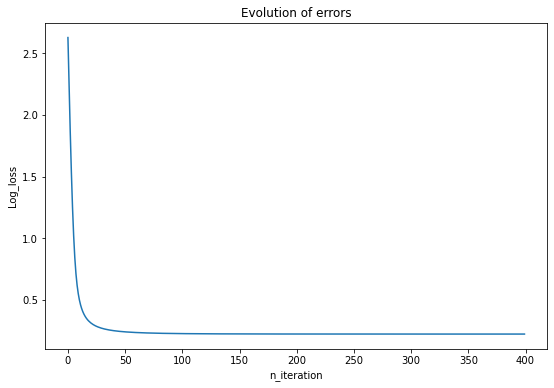

In [18]:
# Amélioration
plt.figure(figsize=(9, 6))
plt.plot(estimator.loss_history)
plt.xlabel('n_iteration')
plt.ylabel('Log_loss')
plt.title('Evolution of errors')

## 3. Testing the accuracy through 5 generations

In [106]:
errors_count = []

for i in range(0,5):
    # Generating a dataset
    x, y = make_unbalanced_dataset(3000, 20211017+i)
    
    # Fitting it in a LR model (the first 1k data)
    estimator = LogisticRegressionClassifier(learning_rate=.1, n_iter=400)
    estimator.fit(x[:1000], y[:1000])
    
    # Getting predictions for the resting 2k
    y_predicted = estimator.predict(x[2000:])
    y_predicted = map(lambda x:1 if x else 0, y_predicted)
    errors_count.append(np.sum(np.absolute(np.subtract(y[2000:], np.array(list(y_predicted))))))
    
print("mean:", np.array(errors_count).mean())
print("sd:", np.array(errors_count).std())

mean: 83.6
sd: 8.138795979750322
